# Case Study: Luxembourg during German occupation (1940-1944)

In [48]:
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns

In [49]:
data_path = "./../../data/inference/"
output_path = "./../../data/inference/"

## Import Data

In [50]:
mentions_fr = pd.read_pickle(data_path + "mentions_fr.pkl")
mentions_de = pd.read_pickle(data_path + 'mentions_de.pkl')
mentions_all = pd.concat([mentions_fr, mentions_de])

#articles_fr = pd.read_pickle(data_path + "articles_fr.pkl")
#articles_de = pd.read_pickle(data_path + 'articles_de.pkl')
#articles = pd.concat([articles_fr, articles_de])

In [51]:
#divide by country
mentions_ch = mentions_all[mentions_all['country'] == 'CH']
mentions_lu = mentions_all[mentions_all['country'] == 'LU']

#articles_ch = articles[articles['country'] == 'CH']
#articles_lu = articles[articles['country'] == 'LU']

In [52]:
#specify decades
decades = sorted(mentions_all['decade'].unique())
relevant_decs = list(range(1840, 2010, 10))

## Plotting Function

In [182]:
#specifying colors for agencies
agencies = sorted(mentions_all['agency'].unique())
colors = plt.cm.tab20
clist = [colors(i) for i in range(colors.N)]
custom_cmap = dict(zip(agencies, clist[:len(agencies)]))

def plot_ag_by_time_lang(orig_df, country, time_level="decade", intervals = relevant_decs, show_plot = True, overlay_df=pd.DataFrame()):

    df = orig_df[orig_df['country'] == country]
    if country == "CH":
        full_country = "Switzerland"
    elif country == "LU":
        full_country = "Luxembourg"
    else:
        raise NameError("Use CH or LU for country")

    fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), sharex=True)

    #overlay df: comparison to all articles in corpus
    if not overlay_df.empty:
        ax12 = ax1.twinx()
        ax22 = ax2.twinx()
        ax12.plot(overlay_df.index, overlay_df['perc_fr'], color='blue', alpha=0.3)
        ax22.plot(overlay_df.index, overlay_df['perc_de'], color='blue', alpha=0.3)
        #ylabel
        ax12.set_ylabel('share of agency content in Lux. newspapers')
        ax12.set_ylabel('share of agency content in Lux. newspapers')
        
    #French
    na_per_decade_fr = pd.pivot_table(df[(df['language'] == "fr") & (df[time_level].isin(intervals))], 
                                    index=time_level, columns="agency", values="article", aggfunc="count")

    na_per_decade_fr.plot(kind="bar", stacked=True, ylabel="#mentions", title=f"{full_country} - FR: #agency mentions per news agency over time", 
                        color=custom_cmap, edgecolor="grey", legend=False, ax=ax1)

    #German
    na_per_decade_de = pd.pivot_table(df[(df['language'] == "de") & (df[time_level].isin(intervals))], 
                                    index=time_level, columns="agency", values="article", aggfunc="count")

    na_per_decade_de.plot(kind="bar", stacked=True, ylabel="#mentions", title=f"{full_country} - DE: #agency mentions per news agency over time", 
                        color=custom_cmap, edgecolor="grey", legend=False, ax=ax2)


    #Plot
    fig.tight_layout(pad=4.0)
    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1,0.5), loc="center left")
    ax1.xaxis.set_tick_params(labelbottom=True, rotation=90)

    if show_plot:
        plt.show()

    else:
        return ax1, ax2


def plot_np_over_time(df, np, cmap=custom_cmap, time_level='decade', figsize=(12,6)):
    np_per_time = pd.pivot_table(df[df['newspaper']==np], index=time_level, columns="agency", values="article", aggfunc="count")

    #plotting
    ax = np_per_time.plot(kind="bar", stacked=True, figsize=figsize, ylabel="#mentions", 
            title=f"{np}: #agency mentions per news agency over time", color=cmap, edgecolor="grey")

    #set legend and xticks
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    if time_level == 'month':
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

## Luxembourg

### 1930s & 1940s

In [152]:
# number of articles in Luxembourg per month
n_articles_1930s_lu = pd.read_csv(data_path + "yearly_count_1930-1949.csv", delimiter=";").rename(columns={"month 1940": "month"}).set_index('year')

articles_lu = mentions_lu.groupby(['language', 'year', 'article']).size().reset_index()
n_articles_1930s_lu['ag_art_de'] = articles_lu[(articles_lu['language'] == 'de') & (articles_lu['year']).isin(list(range(1930, 1950)))].groupby('year').size()
n_articles_1930s_lu['ag_art_fr'] = articles_lu[(articles_lu['language'] == 'fr') & (articles_lu['year']).isin(list(range(1930, 1950)))].groupby('year').size()

n_articles_1930s_lu['perc_de'] = n_articles_1930s_lu['ag_art_de'] / n_articles_1930s_lu['de']
n_articles_1930s_lu['perc_fr'] = n_articles_1930s_lu['ag_art_fr'] / n_articles_1930s_lu['fr']
n_articles_1930s_lu

,de,fr,all,ag_art_de,ag_art_fr,perc_de,perc_fr
year,,,,,,,
1930,35765,11460,47225,2443,30.0,0.068307,0.002618
1931,36671,13384,50056,3232,58.0,0.088135,0.004334
1932,38474,13873,52350,4287,61.0,0.111426,0.004397
1933,43401,14040,57443,4210,53.0,0.097002,0.003775
1934,42400,14622,57026,4223,43.0,0.099599,0.002941
1935,45920,20720,66640,4303,270.0,0.093706,0.013031
1936,43728,31055,74783,2931,405.0,0.067028,0.013041
1937,48111,31088,79211,4357,846.0,0.090561,0.027213
1938,55289,31621,86914,5496,321.0,0.099405,0.010151


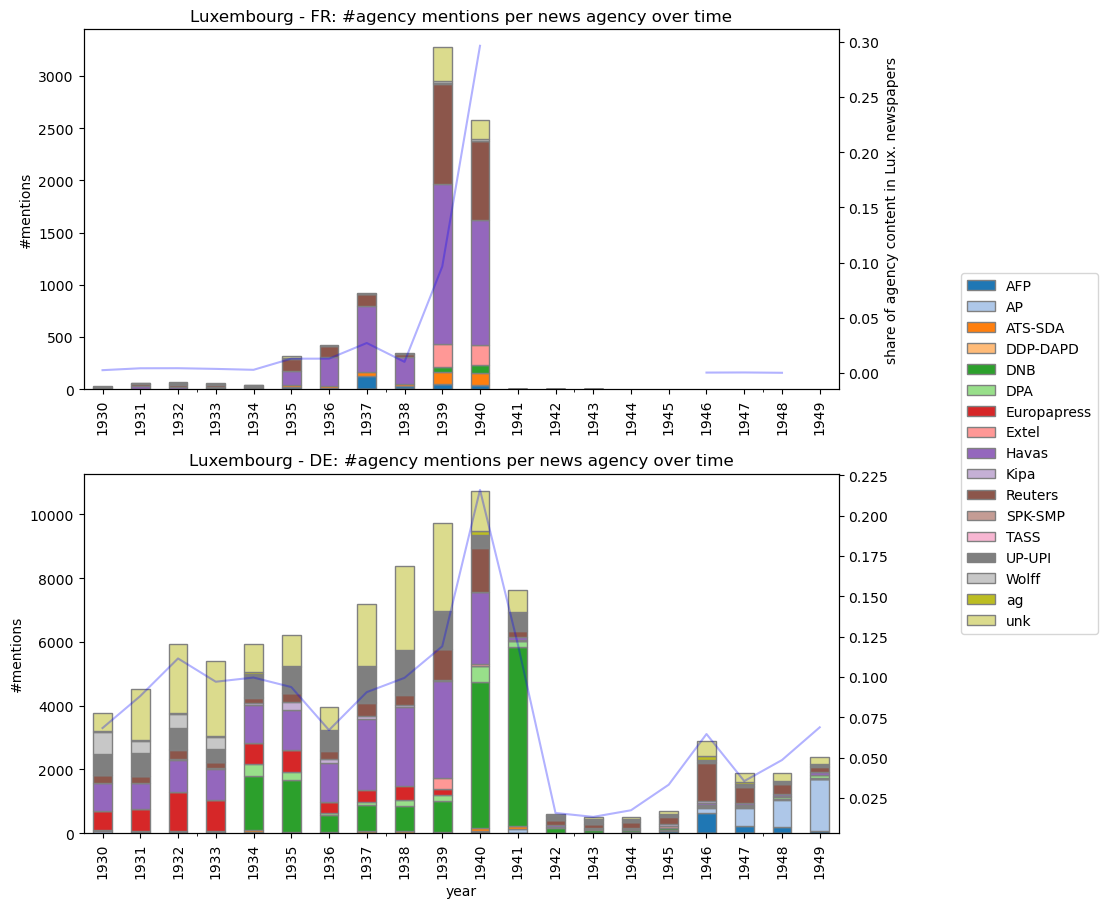

In [165]:
plot_ag_by_time_lang(mentions_lu, "LU", time_level="year", intervals=list(range(1930, 1950, 1)), 
                        overlay_df=n_articles_1930s_lu.reset_index())

In [173]:
mentions_lu.loc[(mentions_lu['agency'] == 'unk') & (mentions_lu['year'].isin(list(range(1930, 1950)))), 'surface'].value_counts()[:20]

Fournier         8799
Telunion         3332
Uniteb           1063
Belga            1053
Conti             421
Agency            311
LLD               309
Agence            277
D. N. B.          230
. N. B.           168
Velga             160
Kp                158
Bureau            151
Taß               133
Agenzia           103
PK                 84
Hcwas              81
Eurovapreß         71
Domei              67
Korrespondenz      65
Name: surface, dtype: int64

### 1940 by month

In [12]:
mentions_lu_1940 = mentions_lu[mentions_lu['year'] == 1940]
mentions_lu_1940['month'] = mentions_lu_1940['date'].apply(lambda x: int(x.split("-")[1]))
mentions_lu_1940.head()

C:\Users\Lea\AppData\Local\Temp\ipykernel_8028\1726002962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentions_lu_1940['month'] = mentions_lu_1940['date'].apply(lambda x: int(x.split("-")[1]))


,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country,month
1266,org.ent.pressagency.Extel,Belga,Q1525848,3,8,1,38,43,luxembourg1935-1940-04-13-a-i0024:1:3:8:38:43:...,luxembourg1935-1940-04-13-a-i0024,luxembourg1935,1940-04-13,1940,1940,Extel,fr,LU,4
6182,org.ent.pressagency.Havas,Havas,Q2826560,2,7,1,60,65,luxembourg1935-1940-05-01-a-i0022:1:2:7:60:65:...,luxembourg1935-1940-05-01-a-i0022,luxembourg1935,1940-05-01,1940,1940,Havas,fr,LU,5
7468,org.ent.pressagency.Reuters,Reuter,Q130879,3,9,1,191,197,luxembourg1935-1940-03-30-a-i0018:1:3:9:191:19...,luxembourg1935-1940-03-30-a-i0018,luxembourg1935,1940-03-30,1940,1940,Reuters,fr,LU,3
8684,org.ent.pressagency.unk,. N. B.,NIL,-1,6,1,31,38,luxembourg1935-1940-02-09-a-i0012:1:-1:6:31:38...,luxembourg1935-1940-02-09-a-i0012,luxembourg1935,1940-02-09,1940,1940,unk,fr,LU,2
10068,org.ent.pressagency.Havas,Havas,Q2826560,3,8,1,38,43,luxembourg1935-1940-03-01-a-i0022:1:3:8:38:43:...,luxembourg1935-1940-03-01-a-i0022,luxembourg1935,1940-03-01,1940,1940,Havas,fr,LU,3


In [81]:
# number of articles in Luxembourg per month
n_articles_1940_lu = pd.read_csv(data_path + "monthly_counts1940_articles.csv", delimiter=";").rename(columns={"month 1940": "month"})
n_articles_1940_lu

,month,de,fr,all
0,1,4286,1660,5946
1,2,4361,1523,5885
2,3,4122,1594,5716
3,4,4117,1721,5839
4,5,2189,516,2705
5,6,1803,5,1808
6,7,2135,1,2136
7,8,2125,7,2132
8,9,2181,2,2183
9,10,3288,5,3293


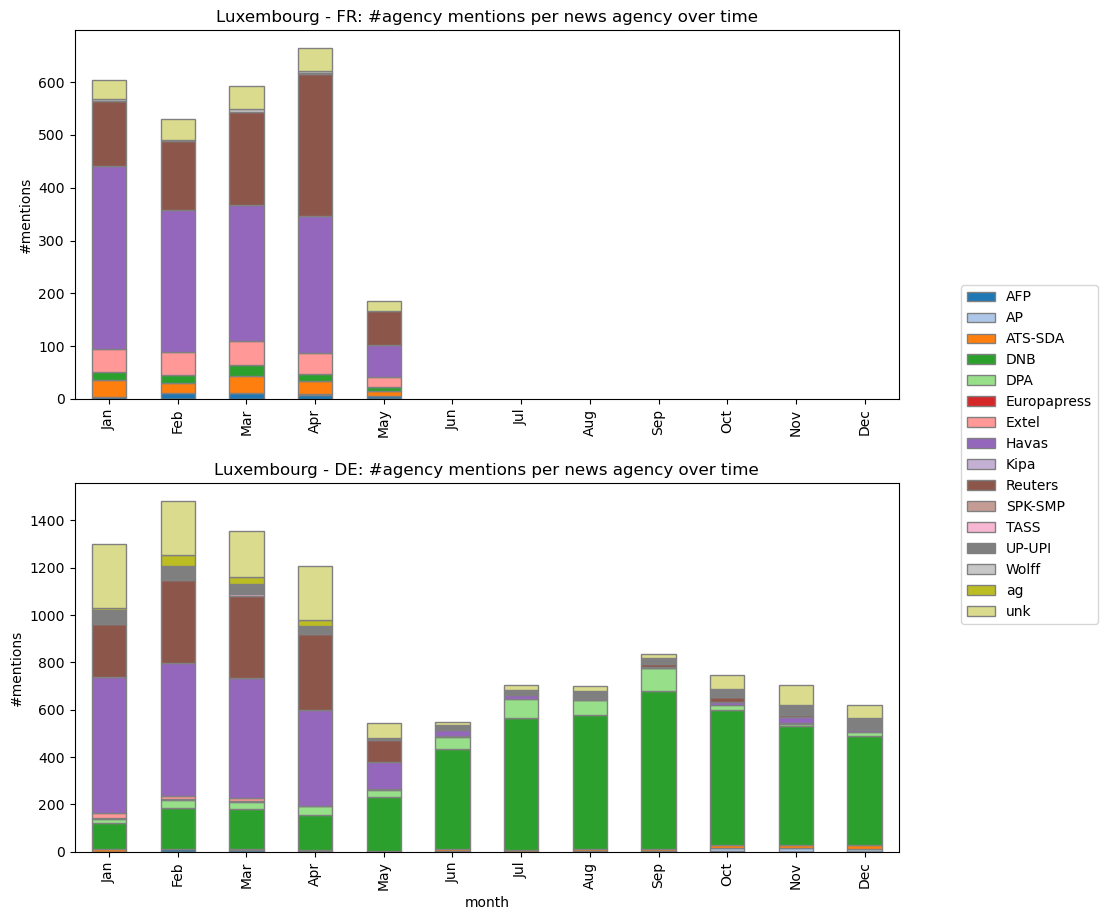

In [129]:
#invasion 10th May
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1, ax2 = plot_ag_by_time_lang(mentions_lu_1940, "LU", time_level="month", intervals=list(range(1, 13, 1)), show_plot=False,)
                               # overlay_df=n_articles_1940_lu)
ax1.set_xticklabels(months)


plt.show()

In [66]:
with open(data_path + "MonthlyCount_Lux_1930-1949.json") as f:
    monthly_count = json.load(f)
monthly_count['facet_fields_1940']

{'meta_month_i': ['1',
  7950,
  '4',
  7834,
  '3',
  7795,
  '2',
  7644,
  '12',
  4684,
  '11',
  4510,
  '10',
  4159,
  '5',
  3587,
  '8',
  2911,
  '9',
  2776,
  '7',
  2685,
  '6',
  2320]}

### 1941 per Month

In [97]:
mentions_lu_1941 = mentions_lu[mentions_lu['year'] == 1941]
mentions_lu_1941['month'] = mentions_lu_1941['date'].apply(lambda x: int(x.split("-")[1]))
mentions_lu_1941.head()

C:\Users\Lea\AppData\Local\Temp\ipykernel_8028\2749878833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentions_lu_1941['month'] = mentions_lu_1941['date'].apply(lambda x: int(x.split("-")[1]))


,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country,month
520,org.ent.pressagency.DNB,DNB,Q1205856,1,4,1,47,50,obermosel-1941-06-04-a-i0025:1:1:4:47:50:newsa...,obermosel-1941-06-04-a-i0025,obermosel,1941-06-04,1941,1940,DNB,de,LU,6
1277,org.ent.pressagency.DNB,DRB,Q1205856,1,4,1,53,56,obermosel-1941-12-24-a-i0067:1:1:4:53:56:newsa...,obermosel-1941-12-24-a-i0067,obermosel,1941-12-24,1941,1940,DNB,de,LU,12
1424,org.ent.pressagency.DNB,DNB,Q1205856,0,3,2,57,60,obermosel-1941-06-05-a-i0045:2:0:3:57:60:newsa...,obermosel-1941-06-05-a-i0045,obermosel,1941-06-05,1941,1940,DNB,de,LU,6
1425,org.ent.pressagency.UP-UPI,Preß,Q493845,29,33,4,160,164,obermosel-1941-06-05-a-i0045:4:29:33:160:164:n...,obermosel-1941-06-05-a-i0045,obermosel,1941-06-05,1941,1940,UP-UPI,de,LU,6
1426,org.ent.pressagency.UP-UPI,Preß,Q493845,140,144,5,340,344,obermosel-1941-06-05-a-i0045:5:140:144:340:344...,obermosel-1941-06-05-a-i0045,obermosel,1941-06-05,1941,1940,UP-UPI,de,LU,6


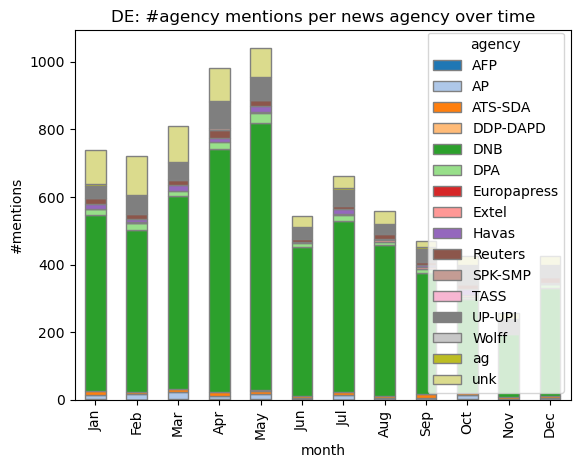

In [178]:
lu_1941_pivot = pd.pivot_table(mentions_lu_1941, index="month", columns="agency", values="article", aggfunc="count")

ax = lu_1941_pivot.plot(kind="bar", stacked=True, ylabel="#mentions", title=f"DE: #agency mentions per news agency over time", 
                        color=custom_cmap, edgecolor="grey")
ax.set_xticklabels(months)
plt.show()

In [107]:
mentions_lu_1941['newspaper'].value_counts()

obermosel    6978
luxwort       510
tageblatt     146
Name: newspaper, dtype: int64

In [108]:
mentions_lu_1942['newspaper'].value_counts()

luxwort      436
tageblatt    174
Name: newspaper, dtype: int64

C:\Users\Lea\AppData\Local\Temp\ipykernel_8028\331981922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentions_lu_1942['month'] = mentions_lu_1942['date'].apply(lambda x: int(x.split("-")[1]))


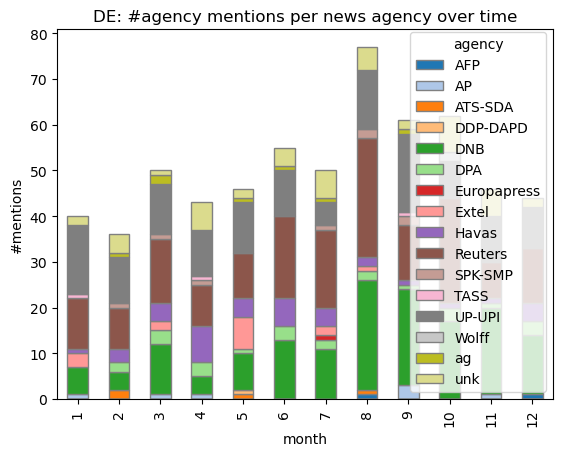

In [104]:
mentions_lu_1942 = mentions_lu[mentions_lu['year'] == 1942]
mentions_lu_1942['month'] = mentions_lu_1942['date'].apply(lambda x: int(x.split("-")[1]))
lu_1942_pivot = pd.pivot_table(mentions_lu_1942, index="month", columns="agency", values="article", aggfunc="count")

lu_1942_pivot.plot(kind="bar", stacked=True, ylabel="#mentions", title=f"DE: #agency mentions per news agency over time", 
                        color=custom_cmap, edgecolor="grey")
plt.show()

### newspapers in corpus

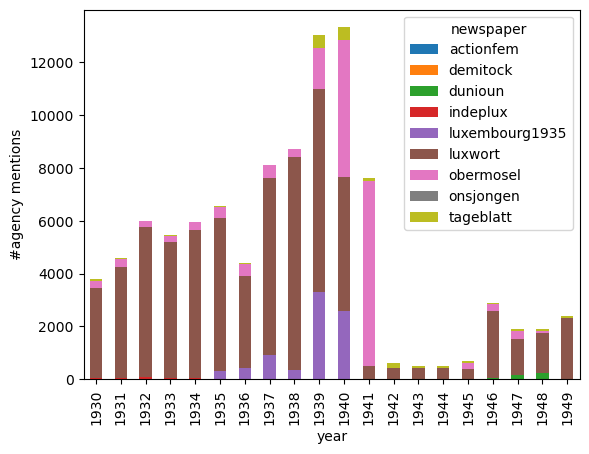

In [169]:
mentions_lu_by_np = pd.pivot_table(mentions_lu[mentions_lu['year'].isin(list(range(1930, 1950)))], index="year", columns="newspaper", values="article", aggfunc="count")
mentions_lu_by_np.plot.bar(stacked=True)
plt.ylabel('#agency mentions')
plt.show()

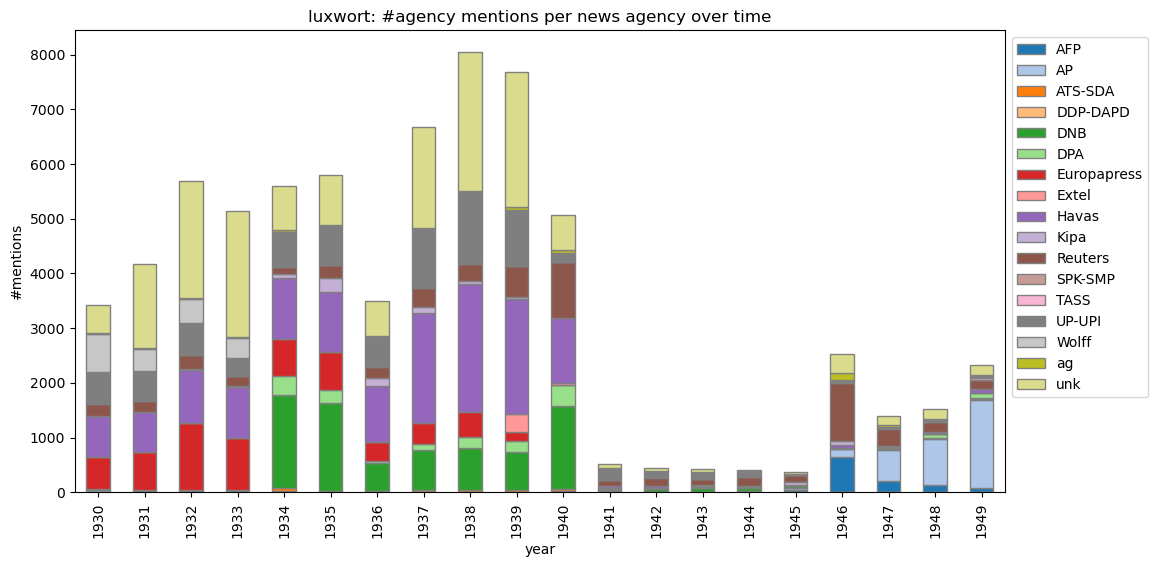

In [167]:
plot_np_over_time(mentions_lu[mentions_lu['year'].isin(list(range(1930, 1950)))], 'luxwort', time_level='year')

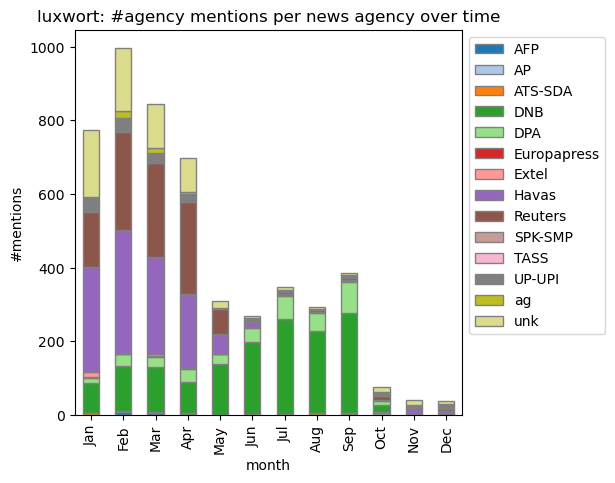

In [185]:
plot_np_over_time(mentions_lu_1940, 'luxwort', time_level='month', figsize=(5,5))

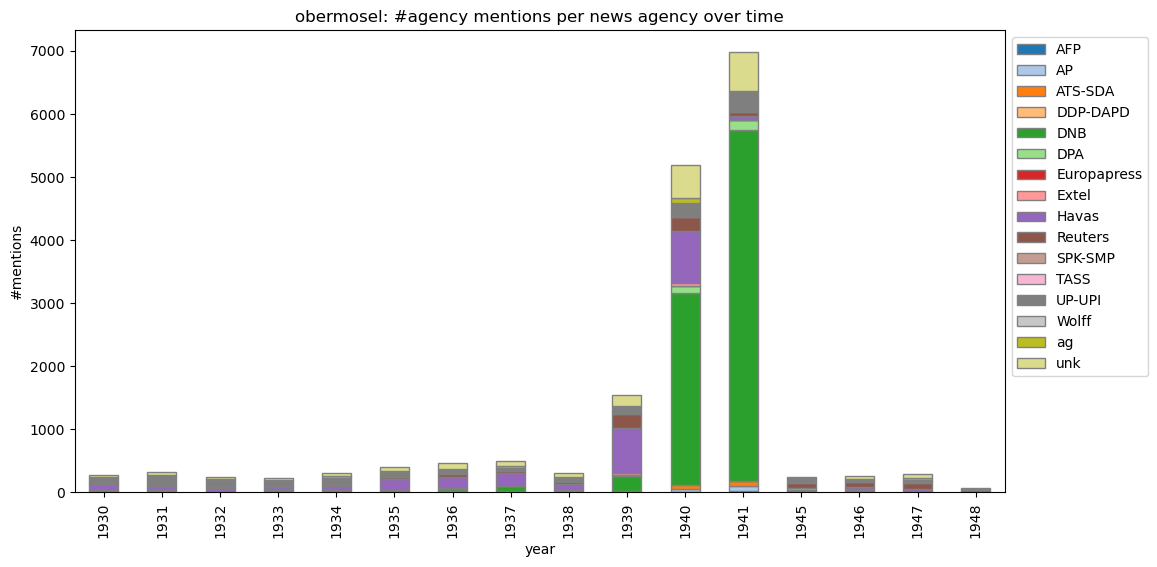

In [120]:
plot_np_over_time(mentions_lu[mentions_lu['year'].isin(list(range(1930, 1950)))], 'obermosel', time_level='year')

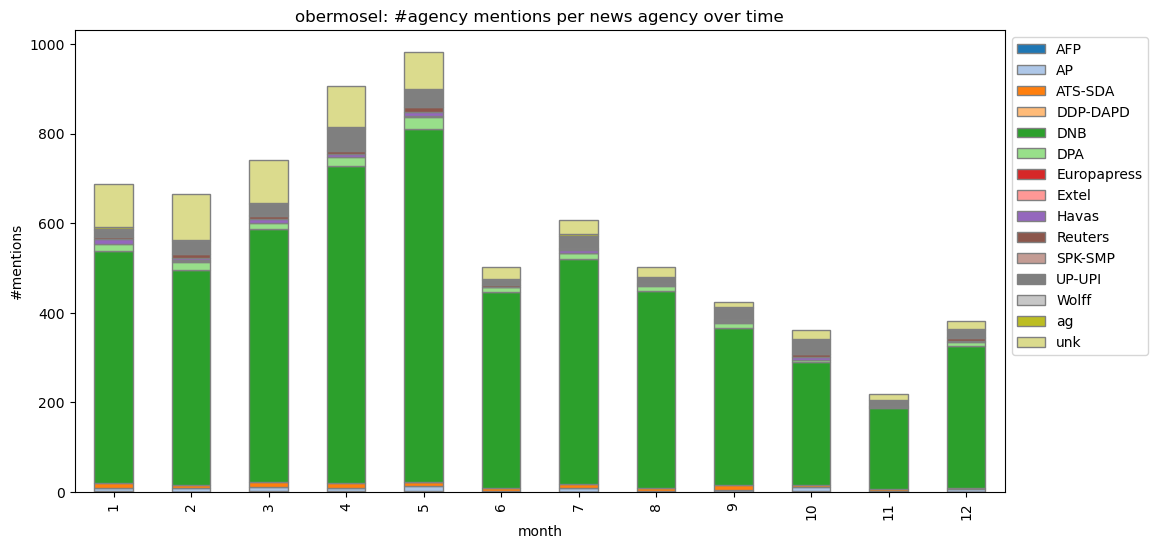

In [127]:
plot_np_over_time(mentions_lu_1941, 'obermosel', time_level='month')

## Switzerland (for Comparison)

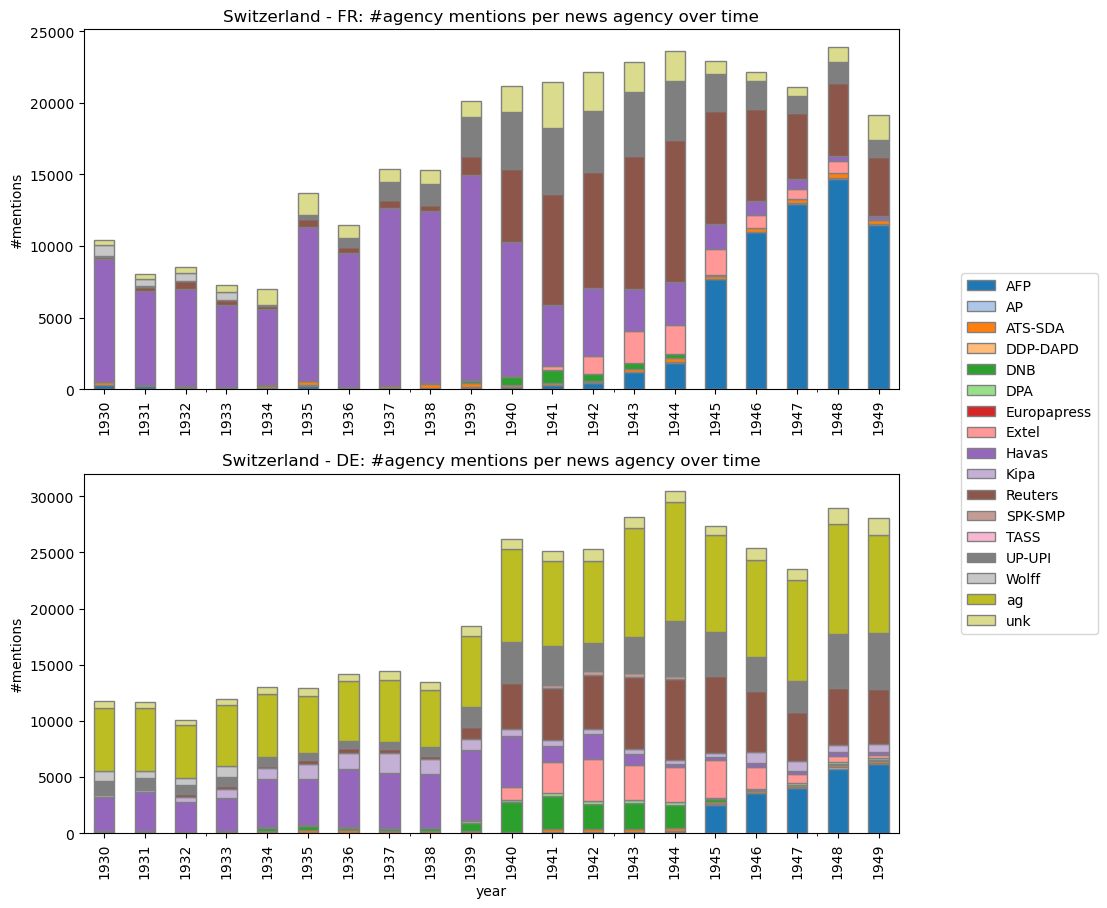

In [9]:
plot_ag_by_time_lang(mentions_ch, "CH", time_level="year", intervals=list(range(1930, 1950, 1)))

In [18]:
mentions_ch_1940 = mentions_ch[mentions_ch['year'] == 1940]
mentions_ch_1940['month'] = mentions_ch_1940['date'].apply(lambda x: int(x.split("-")[1]))
mentions_ch_1940.head(2)

C:\Users\Lea\AppData\Local\Temp\ipykernel_8028\446348757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentions_ch_1940['month'] = mentions_ch_1940['date'].apply(lambda x: int(x.split("-")[1]))


,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country,month
604,org.ent.pressagency.Reuters,Reuter,Q130879,1,7,2,302,308,GDL-1940-07-23-a-i0066:2:1:7:302:308:newsag:be...,GDL-1940-07-23-a-i0066,GDL,1940-07-23,1940,1940,Reuters,fr,CH,7
605,org.ent.pressagency.Reuters,Reuter,Q130879,521,527,10,6625,6631,GDL-1940-07-23-a-i0066:10:521:527:6625:6631:ne...,GDL-1940-07-23-a-i0066,GDL,1940-07-23,1940,1940,Reuters,fr,CH,7


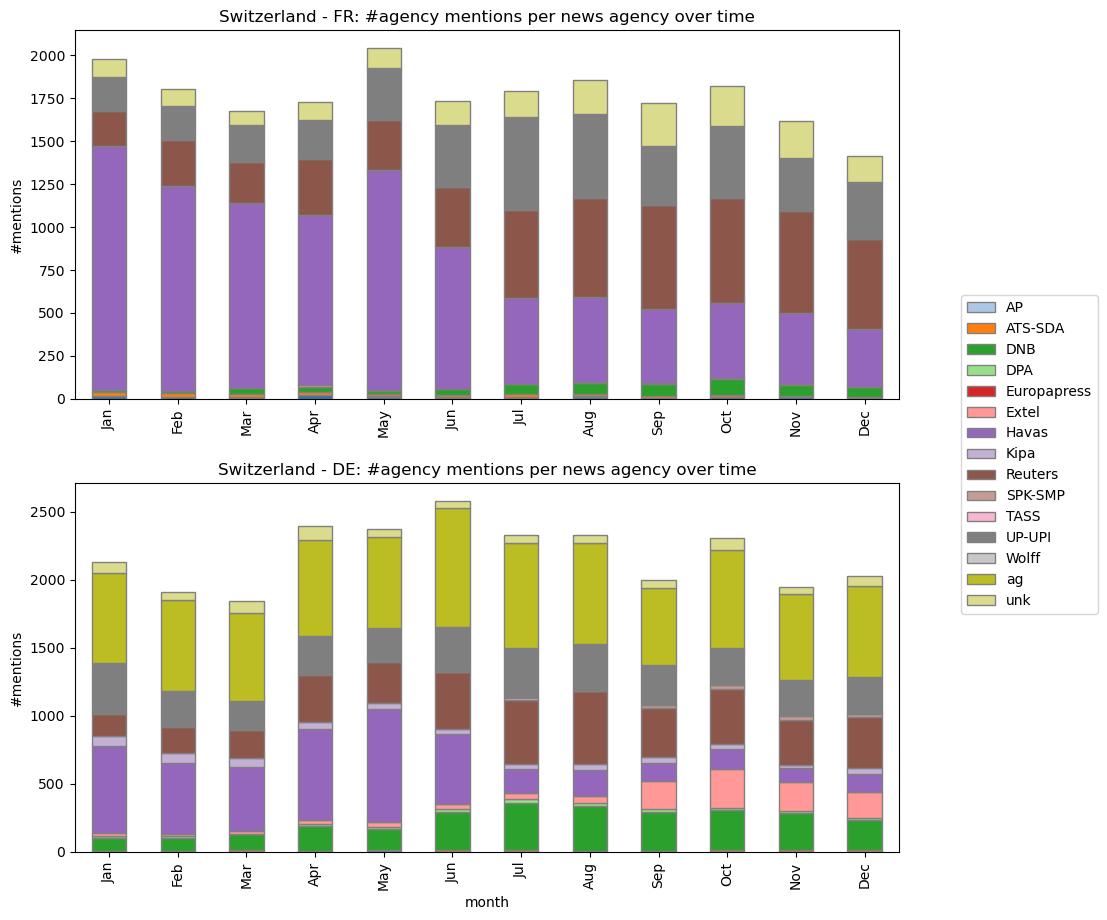

In [19]:
ax1, ax2 = plot_ag_by_time_lang(mentions_ch_1940, "CH", time_level="month", intervals=list(range(1, 13, 1)), show_plot=False)
ax1.set_xticklabels(months)

plt.show()

#### DNB in Switzerland

In [34]:
#German part
DNB_ch_de = mentions_ch.loc[(mentions_ch['agency'] == 'DNB') & (mentions_ch['language'] == 'de')]
DNB_ch_de['newspaper'].value_counts()/mentions_ch.loc[mentions_ch['language'] == 'de', 'newspaper'].value_counts()

BLB         NaN
BNN    0.024164
DFS         NaN
DLE         NaN
DTT    0.013974
DVF    0.004975
EZR    0.009174
FCT    0.019231
FZG    0.008638
GAV         NaN
HRV         NaN
LAB    0.008658
LLE    0.012371
MGS         NaN
NTS    0.009967
NZG    0.003367
NZZ    0.025314
OIZ    0.014521
SGZ    0.003597
SMZ    0.022472
VHT    0.017487
WHD         NaN
ZBT         NaN
Name: newspaper, dtype: float64

In [36]:
DNB_ch_de.sample(5, random_state=1)

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
1012189,org.ent.pressagency.DNB,DNV,Q1205856,2,5,72,15425,15428,NZZ-1937-04-06-f-i0002:72:2:5:15425:15428:news...,NZZ-1937-04-06-f-i0002,NZZ,1937-04-06,1937,1930,DNB,de,CH
1919743,org.ent.pressagency.DNB,TNB,Q1205856,432,435,12,2108,2111,NZZ-1941-07-19-a-i0002:12:432:435:2108:2111:ne...,NZZ-1941-07-19-a-i0002,NZZ,1941-07-19,1941,1940,DNB,de,CH
119992,org.ent.pressagency.DNB,DNB,Q1205856,2,5,19,1678,1681,DTT-1941-10-18-a-i0106:19:2:5:1678:1681:newsag...,DTT-1941-10-18-a-i0106,DTT,1941-10-18,1941,1940,DNB,de,CH
3095343,org.ent.pressagency.DNB,SNB,Q1205856,34,37,7,506,509,FZG-2006-12-15-a-i0006:7:34:37:506:509:newsag:...,FZG-2006-12-15-a-i0006,FZG,2006-12-15,2006,2000,DNB,de,CH
1429378,org.ent.pressagency.DNB,DKR,Q1205856,0,3,33,4542,4545,NZZ-1943-05-04-f-i0003:33:0:3:4542:4545:newsag...,NZZ-1943-05-04-f-i0003,NZZ,1943-05-04,1943,1940,DNB,de,CH


- NZZ-1937-04-06-f-i0002:  
    - ( DNV ) Der Schnelldampfer . Bremen " des Norddeutschen Lloyd ist beim havarierte » Dampfer eingetroffen . Außer den » Kapitän hat der Erste Offizier eine Verletzung erlitten . Ein Matrose verunglückte tödlich . Der Dampfer ist außer Gefahr .
- NZZ-1941-07-19-a-i0002:  
    - Berlin , 18 . Juli . ( TNB ) In den zwanzig Stünden vom Mitlag des I ?. Juli bis zum frühen Vormittag des 18 . Juli verlor die b r i >; tische Luftwaffe 32 W a f ch i n e n . Alle Versuche der britischen Piloten , das befehle Ge »biet oder Reichsgebiet anzugreifen , brachen im sfoucr der deutschen Luft » und Einige Bodenabwehr zusammen .
- DTT-1941-10-18-a-i0106:
    -  Berlin , 17 . Okt . ( DNB . ) Das Oberkommando der Wehrmacht gibt bekannt : ...

False Positives:
- FZG-2006-12-15-a-i0006: FP
    - Die Schweizerische Nationalbank ( SNB ) tritt erneut leicht auf die Bremse
- NZZ-1943-05-04-f-i0003: FP
    -  N e u b a 11 a c n am Rheinfall , den 30 . April 1043 . DKR VERWALTUNGSRAT

In [35]:
#French part
DNB_ch_fr = mentions_ch.loc[(mentions_ch['agency'] == 'DNB') & (mentions_ch['language'] == 'fr')]
DNB_ch_fr['newspaper'].value_counts()/mentions_ch.loc[mentions_ch['language'] == 'fr', 'newspaper'].value_counts()

CDV         NaN
CON         NaN
EDA         NaN
EXP    0.000018
FZG         NaN
GAV         NaN
GAZ         NaN
GDL    0.003034
IMP    0.000010
JDF         NaN
JDG    0.000476
JDV         NaN
LBP         NaN
LCE         NaN
LCG         NaN
LCR         NaN
LES         NaN
LLE    0.001904
LLS         NaN
LNF         NaN
LSE    0.002819
LSR         NaN
LTF         NaN
LVE         NaN
SDT         NaN
VHT         NaN
Name: newspaper, dtype: float64

In [38]:
DNB_ch_fr.sample(5, random_state=1)

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
2484543,org.ent.pressagency.DNB,DNB,Q1205856,1,4,1,65,68,GDL-1941-05-01-a-i0093:1:1:4:65:68:newsag:bert_fr,GDL-1941-05-01-a-i0093,GDL,1941-05-01,1941,1940,DNB,fr,CH
4535812,org.ent.pressagency.DNB,DNB,Q1205856,2,5,10,1298,1301,LLE-1940-10-26-a-i0034:10:2:5:1298:1301:newsag...,LLE-1940-10-26-a-i0034,LLE,1940-10-26,1940,1940,DNB,fr,CH
3781367,org.ent.pressagency.DNB,DNJB,Q1205856,8,12,3,1406,1410,GDL-1942-02-25-a-i0105:3:8:12:1406:1410:newsag...,GDL-1942-02-25-a-i0105,GDL,1942-02-25,1942,1940,DNB,fr,CH
3450608,org.ent.pressagency.DNB,DNB,Q1205856,72,75,53,7050,7053,GDL-1942-06-04-a-i0045:53:72:75:7050:7053:news...,GDL-1942-06-04-a-i0045,GDL,1942-06-04,1942,1940,DNB,fr,CH
1699444,org.ent.pressagency.DNB,DNB,Q1205856,2,5,31,1936,1939,LLE-1941-02-13-a-i0016:31:2:5:1936:1939:newsag...,LLE-1941-02-13-a-i0016,LLE,1941-02-13,1941,1940,DNB,fr,CH


- GDL-1941-05-01-a-i0093: explicitly marked as German communiqué
    - COMMUNIQUÉ ALLEMAND - Berlin, 30 avril. - (DNB.) _ Le haut commandement de l'armée communique :. Des sous-marins ont coulé 32,265 tonnes d'un convoi de navires de commerce ennemis fortement escorté et un bâtiment convoyeur de la marine de guerre britannique. 
- LLE-1940-10-26-a-i0034: neutral style
    -  Berlin , 26 octobre . ( DNB . ) — Les attaques de l aviation allemande portées vendredi contre des objectifs stratégiques de Londres et du sud de l Angleterre ont continué également , avec l envergure habituelle , après la tombée de la nuit .
- GDL-1942-02-25-a-i0105: neutral style
    -   " Tokio, 24 février. " . ([( DNJB.) — Une administration militaire, soumise au lieutenantrgénéral Yarhashita a été désignée pour le territoire occupé « de Màlaisie et a déjà commencé son activité. Une administration particulière a été constituée pour Singapour. Le vice .-ministre de l'intérieur Shigeo Odate, exsecrétaire général du gouvernement de Mandchoukouo, a été nommé bourgmestre de Singapour.
- GDL-1942-06-04-a-i0045: below
- LLE-1941-02-13-a-i0016:
    -  Rome , 13 février . ( DNB . ) — On déclare à Rome que les bruils répandus par une agence américaine , selon lesquels un armistice serait prochainement signé entre l Angleterre et l Italie , sont qualifiés de ridicules dans les milieux politiques italiens .

# Look closer at GDL-1942-06-04-a-i0045 !
-> how is German war report embedded in page? Compare to NZZ (above)

### unk token in Switzerland

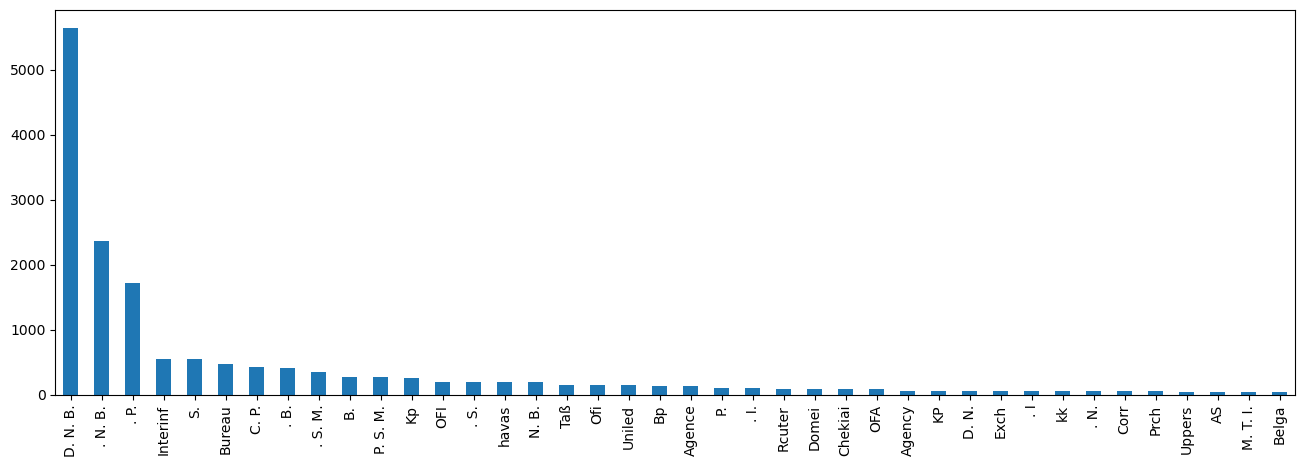

In [47]:
mentions_ch.loc[(mentions_ch['year']).isin(list(range(1939, 1946))) & (mentions_ch['agency'] == 'unk'), 'surface'].value_counts()[:40].plot.bar(figsize=(16,5))
plt.show()
# > mostly agencies wrongly classified as 'unk'

## Extel

Palmer: International News Agencies (2019):
> "in Britain, the Maclean agency (1868) started by the former Reuters agent in the US during the civil war, Central News (1863) and Exchange Telegraph (Extel, 1872), all occupied niche markets; the two latter had their own war correspondents. In Paris, a host of new agencies started up. Havas referred to them disparagingly as “agencicules”, monitoring about 50 such start-ups." 


Wikipedia:
> "The Exchange Telegraph Co. Ltd. (also known as Extel) was created in March 1872 specifically to distribute financial and business information from the London Stock Exchange and other commercial markets direct to subscribers."


- -> financial news (Wikipedia) & War Reporting

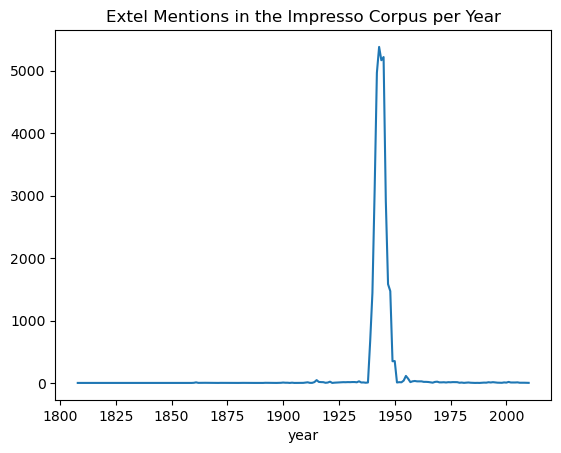

In [26]:
mentions_all.loc[mentions_all['agency'] == 'Extel', ['year']].groupby('year').size().plot(title="Extel Mentions in the Impresso Corpus per Year")
plt.show()

In [21]:
mentions_all[mentions_all['agency'] == 'Extel'].sample(5, random_state=1)

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
2570293,org.ent.pressagency.Extel,Extel,Q1525848,2,7,37,3598,3603,IMP-1941-03-20-a-i0102:37:2:7:3598:3603:newsag...,IMP-1941-03-20-a-i0102,IMP,1941-03-20,1941,1940,Extel,fr,CH
1995988,org.ent.pressagency.Extel,Exchange,Q1525848,2,10,15,3344,3352,DTT-1941-01-30-a-i0004:15:2:10:3344:3352:newsa...,DTT-1941-01-30-a-i0004,DTT,1941-01-30,1941,1940,Extel,de,CH
1397917,org.ent.pressagency.Extel,Exchange,Q1525848,2,10,11,1345,1353,DTT-1943-09-13-a-i0050:11:2:10:1345:1353:newsa...,DTT-1943-09-13-a-i0050,DTT,1943-09-13,1943,1940,Extel,de,CH
4547309,org.ent.pressagency.Extel,Exchange,Q1525848,39,47,3,113,121,DTT-1941-02-04-a-i0023:3:39:47:113:121:newsag:...,DTT-1941-02-04-a-i0023,DTT,1941-02-04,1941,1940,Extel,de,CH
2769520,org.ent.pressagency.Extel,Exchange,Q1525848,369,377,29,6309,6317,NZZ-1944-08-28-d-i0001:29:369:377:6309:6317:ne...,NZZ-1944-08-28-d-i0001,NZZ,1944-08-28,1944,1940,Extel,de,CH


- IMP-1941-03-20-a-i0102: La guerre en Afrique
- DTT-1941-01-30-a-i0004: Die Kämpfe in Afrika
- DTT-1943-09-13-a-i0050: Der amerikanische Vizepräsident Wallace machte den Vorschlag , Roosevelt sollte nach dem Kriege zum permanenten Vorsitzenden der Friedenskonferenz ernannt werden
- DTT-1941-02-04-a-i0023: **Die militärische Berichterstattung der Exchange meldet** : « Die Einnahme von Agordat , die am Samstagfrüh erfolgle , wird im Hauptquartier als eine der wichtigsten Entwicklungen der Kämpfe im westlichen Erythräa angesehen .
- NZZ-1944-08-28-d-i0001: Schon in Tagen den nächsten dürsten sich die Hauptkämpfe aus franzö » sischem Boden dem Gebiet des Pas de Calais und damit dem Einsatzgebiet der >; Ge » deutschen Erlundungspiloten Heimwaffen " nähern .